In [1]:
import numpy as np
import pandas as pd
import pandas_profiling as pp
import re
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import scipy.stats as scs
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import researchpy as rp
from datetime import datetime
#import plotly.plotly as py
#from plotly.graph_objs import *

warnings.filterwarnings("ignore")
#pandas default the display of columns to 20, so changing it to 100
pd.options.display.max_columns = 200

In [2]:
#loan = pd.read_csv(r'D:\Learning & Development\IIIT Data Science\Course 1\Case Study\loan.csv',header=0, encoding="utf-8")
loan = pd.read_csv('loan.csv',header=0, encoding="utf-8")

In [3]:
#finding the total number of rows and columns
loan.shape

(39717, 111)

In [4]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

# --------------------- Business Understanding ---------------------------
​
There are 3 types of attributes in the data set
​
​
#### Customer's Demographic Information: 
emp_title 
emp_length
home_ownership
annual_inc
verification_status
addr_state
zip_code
title
purpose
desc
url
​
​
#### Loan Characteristics Information
loan amount
funded amount
funded amount invested
interest rate
loan status
grade
sub-grade
dti
issue date
term
installment
revol_util
application_type    
​
#### Credit information: Customer Behaviour variables 
delinq_2yrs
earliest_cr_line
inq_last_6mths
open_acc
pub_rec
revol_bal
total_acc
out_prncp 
out_prncp_inv
total_pymnt           
total_pymnt_inv
total_rec_prncp
total_rec_int 
total_rec_late_fee 
recoveries             
collection_recovery_fee
last_pymnt_d
last_pymnt_amnt
last_credit_pull_d   
​
#### Business Objective
The company wants to understand the driving factors behind the loan default. 
If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. 
Identification of such applicants using EDA is the aim of this case study. 
​
#### Mapping business problem with the dataset.
The variables related to the customer behaviour data can not be collected at the time of application.
Thus analysing these variables will not help solve 
our business problem. As per the business problem, we want to understand the driving factors behind the loan default
at the time of application stage.
​
So, we are using the following type of attributes for analysis
1. Attributes pertaining to Customers demographic and its characteristics
2. Attributes pertaining to the loan characteristics 

# Data Cleaning

#### 1. Data Cleaning - Dropping customer behaviour variables since this will not be known at the time of the application.

In [5]:
#removing the customer behaviour variables from the loan dataset
loan_risk=loan.drop(['delinq_2yrs','earliest_cr_line','inq_last_6mths','open_acc','total_acc','pub_rec','revol_bal',
                     'out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee',
                     'recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d'],axis=1)

Checking how many null values are in each column and calculating percentage of null values.

In [6]:

loan_risk.isnull().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


In [7]:
prct_loan_missing=(loan_risk.isnull().sum()/len(loan_risk)).round(4)*100

#### 2. Data Cleaning - Removing features associated with >85% missing values

In [8]:
'''dropping the missing values having missing percentage more than 85%'''
loan_risk=loan_risk.loc[:, loan_risk.isnull().mean() < .85]
loan_risk.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
mths_since_last_delinq        25682
revol_util                       50
initial_list_status         

#### 3. Data Cleaning - Dropping features with unique value in all the rows, since these do not add any value to the analysis. Features being dropped are listed below.


In [9]:
def find_constant_features(dataFrame):
    const_features = []
    for column in (list(dataFrame.columns)):
        if dataFrame[column].unique().size < 2:
            const_features.append(column)
    return const_features

const_features = find_constant_features(loan_risk)
print(const_features)

loan_risk.drop(const_features, axis = 1, inplace = True)

['pymnt_plan', 'initial_list_status', 'policy_code', 'application_type', 'acc_now_delinq', 'delinq_amnt']


#### 4. Data Cleaning - Looking for duplicate features to be removed. Turns out there are none here

In [10]:
'''Removed the duplicate features'''
def find_duplicate_columns(frame):
    groups = frame.columns.to_series().groupby(frame.dtypes).groups
    dups = []
    for t, v in groups.items():
        cs = frame[v].columns
        vs = frame[v]
        lcs = len(cs)
    for i in range(lcs):
            ia = vs.iloc[:,i].values
            for j in range(i+1, lcs):
                ja = vs.iloc[:,j].values
                if np.array_equal(ia, ja):
                    dups.append(cs[i])
                    break
    return dups
duplicate_cols = find_duplicate_columns(loan_risk)
print(duplicate_cols)

##no duplicate values/columns

[]


In [11]:
loan_risk.shape

(39717, 30)

### Data Exploration

Running pandas_profiling for fast and simple exploratory data analysis of loan dataframe

In [12]:
pp.ProfileReport(loan_risk)

Number of variables,30
Number of observations,39717
Total Missing (%),3.6%
Total size in memory,9.1 MiB
Average record size in memory,240.0 B
Numeric,6
Categorical,16
Boolean,3
Date,0
Text (Unique),1
Rejected,4


#### 4. Data Cleaning - Based on the Pandas profiling report, 
1. dropping desc,emp_title,zip_code as it is irrelevant
2. installment as this is highly corr to funded amnt inv
3. funded_amnt_inv this is highly correlated to funded_amnt
4. dropping funded_amnt as they are highly correlated to loan_amnt

In [13]:


loan_risk.drop(['desc','id','emp_title','funded_amnt','funded_amnt_inv','installment','member_id','title','zip_code','url','pub_rec_bankruptcies'],axis=1,inplace=True)

#### 5. Data Cleaning - Replace Charged Off with 1 and Fully Paid and Current with 0 for further analysis

In [14]:
#changing the loan_status variable in 0 and 1
#0: not likely to default
#1:likely to default
loan_risk['loan_status']=loan_risk['loan_status'].str.replace('Fully Paid','0')
loan_risk['loan_status']=loan_risk['loan_status'].str.replace('Current','0')
loan_risk['loan_status']=loan_risk['loan_status'].str.replace('Charged Off','1')

Checking the 5 summary statistics of the numerical features

In [15]:
loan_describe=loan_risk.describe(include='all').T
loan_describe

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
loan_amnt,39717,NaN,NaN,NaN,11219.4,7456.67,500,5500,10000,15000,35000
term,39717,2,36 months,29096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
int_rate,39717,371,10.99%,956,NaN,NaN,NaN,NaN,NaN,NaN,NaN
grade,39717,7,B,12020,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sub_grade,39717,35,B3,2917,NaN,NaN,NaN,NaN,NaN,NaN,NaN
emp_length,38642,11,10+ years,8879,NaN,NaN,NaN,NaN,NaN,NaN,NaN
home_ownership,39717,5,RENT,18899,NaN,NaN,NaN,NaN,NaN,NaN,NaN
annual_inc,39717,NaN,NaN,NaN,68968.9,63793.8,4000,40404,59000,82300,6e+06
verification_status,39717,3,Not Verified,16921,NaN,NaN,NaN,NaN,NaN,NaN,NaN
issue_d,39717,55,Dec-11,2260,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 6. Data Cleaning - Removing features having 5 statistics value as zero

In [16]:
#removing features having 5 statistics value as zero
loan_risk['collections_12_mths_ex_med'].value_counts()

0.0    39661
Name: collections_12_mths_ex_med, dtype: int64

In [17]:

loan_risk['chargeoff_within_12_mths'].value_counts()

0.0    39661
Name: chargeoff_within_12_mths, dtype: int64

In [18]:

loan_risk['tax_liens'].value_counts()

0.0    39678
Name: tax_liens, dtype: int64

In [19]:
loan_risk.drop(['collections_12_mths_ex_med','chargeoff_within_12_mths','tax_liens'],axis=1,inplace=True)

#### 7. Data Cleaning - Dropping values in purpose for which percentage is less than 2%

In [20]:
#dropping values in purpose for which percentage is less than 2%
del_loan_purpose = (loan_risk.purpose.value_counts()*100)/len(loan_risk)
del_loan_purpose = del_loan_purpose[(del_loan_purpose < 2) ]
del_loan_purpose

medical             1.744845
moving              1.467885
vacation            0.959287
house               0.959287
educational         0.818289
renewable_energy    0.259335
Name: purpose, dtype: float64

In [21]:
loan_risk.drop(labels = loan_risk[loan_risk.purpose.isin(del_loan_purpose.index)].index, inplace=True)
loan_risk['purpose'].unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase'],
      dtype=object)

#### 8. Data Cleaning - Dropping values in addr_state for which percentage is less than 2%

In [22]:
#dropping values in addr_state for which percentage is less than 2%
del_loan_addr_state = (loan_risk.addr_state.value_counts()*100)/len(loan_risk)
del_loan_addr_state = del_loan_addr_state[(del_loan_addr_state < 2) ]
del_loan_addr_state

NC    1.994577
CO    1.962363
CT    1.916727
MI    1.771765
MO    1.747604
MN    1.559690
NV    1.240235
SC    1.186545
WI    1.173123
AL    1.154331
OR    1.114064
LA    1.095273
KY    0.824139
OK    0.740920
KS    0.684545
UT    0.633540
AR    0.625487
DC    0.536898
RI    0.507369
NM    0.488577
WV    0.445626
HI    0.437572
NH    0.434888
DE    0.289925
WY    0.214759
MT    0.209390
AK    0.204021
SD    0.169123
VT    0.139594
TN    0.042952
MS    0.042952
IN    0.021476
ID    0.016107
NE    0.013422
IA    0.010738
ME    0.008053
Name: addr_state, dtype: float64

In [23]:
loan_risk.drop(labels = loan_risk[loan_risk.addr_state.isin(del_loan_addr_state.index)].index, inplace=True)
loan_risk['addr_state'].unique()

array(['AZ', 'GA', 'IL', 'CA', 'TX', 'VA', 'FL', 'NY', 'PA', 'NJ', 'OH',
       'MA', 'WA', 'MD'], dtype=object)

#### 10. Data Cleaning - Formatting some more features for further use

In [24]:
#converting few features in numeric
loan_risk[['loan_amnt','annual_inc']] = loan_risk[['loan_amnt','annual_inc']].apply(pd.to_numeric)
loan_risk.term=loan_risk['term'].str.replace('months','').astype(np.int)
loan_risk['int_rate']=loan_risk['int_rate'].str.replace('%','').astype(np.float64)
loan_risk['revol_util']=loan_risk['revol_util'].str.replace('%','').astype(np.float64)

#assuming blank values in emp_length as 0
loan_risk.emp_length.fillna(value=0,inplace=True)

loan_risk['emp_length'].replace(to_replace='[^0-9]+', value='', inplace=True, regex=True)
loan_risk['emp_length'] = loan_risk['emp_length'].astype(int)

In [25]:
loan_risk.shape

(27693, 16)

In [26]:
loan_risk.columns

Index(['loan_amnt', 'term', 'int_rate', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'addr_state', 'dti', 'mths_since_last_delinq',
       'revol_util'],
      dtype='object')

### Univariate Analysis

#### Loan Status %

0    85.859242
1    14.140758
Name: loan_status, dtype: float64


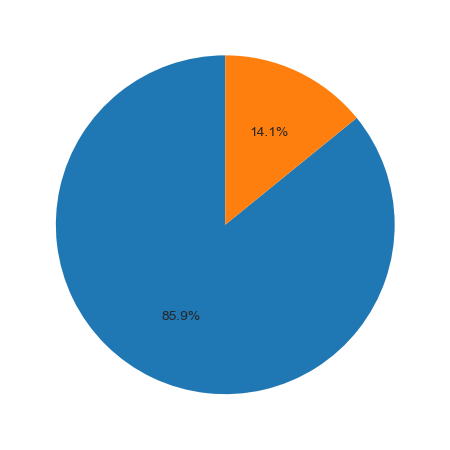

In [27]:
#proportion of defaults and non-defaults
loanst_prop=(loan_risk['loan_status'].value_counts()/len(loan_risk))*100
loanst_prop.reset_index()
print(loanst_prop)
plt.pie(loanst_prop ,startangle=90, autopct='%.1f%%')
plt.show()

For the purpose of analysis, we will write a UDF to plot charts for continuous and discrete data and use it wherever possible.

In [28]:

'''Plots plots: analysing the continous and discrete features alone and with the loan status'''
def plot_feature(col_name, isContinuous, withLoanStatus ):
    """
    Visualize a variable with and without faceting on the loan status.
    - col_name is the variable name in the dataframe
    - full_name is the full variable name
    - continuous is True if the variable is continuous, False otherwise
    """
    if withLoanStatus:
        f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,4), dpi=90)
    else:
        f, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(8,4), dpi=90)
    
    # Plot without loan status
    if isContinuous:
        sns.distplot(loan_risk.loc[loan_risk[col_name].notnull(), col_name], kde=False, ax=ax1)
        plt.xticks(rotation = 90)
    else:
        sns.countplot(loan_risk[col_name], order=sorted(loan_risk[col_name].unique()), color='#5975A4', saturation=1, ax=ax1)        
        ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
        
    ax1.set_xlabel(col_name)
    ax1.set_ylabel(col_name + ' Count')
    ax1.set_title(col_name + ' Distribution')
    
# Plot with loan status
    if withLoanStatus:
        if isContinuous:
            sns.boxplot(x=col_name, y='loan_status', data=loan_risk, ax=ax2)
            ax2.set_ylabel('')
            ax2.set_title(col_name + ' by Loan Status')
        else:
            data = loan_risk.groupby(col_name)['loan_status'].value_counts(normalize=True).to_frame('proportion').reset_index()        
            
            sns.barplot(x = col_name, y='proportion', hue= 'loan_status', data = data, saturation=1, ax=ax2)
            
            ax2.set_ylabel('Loan fraction')
            ax2.set_title(col_name + ' Vs Loan status')
            plt.xticks(rotation = 90)
        ax2.set_xlabel(col_name)

    plt.tight_layout()

#### Interest rate

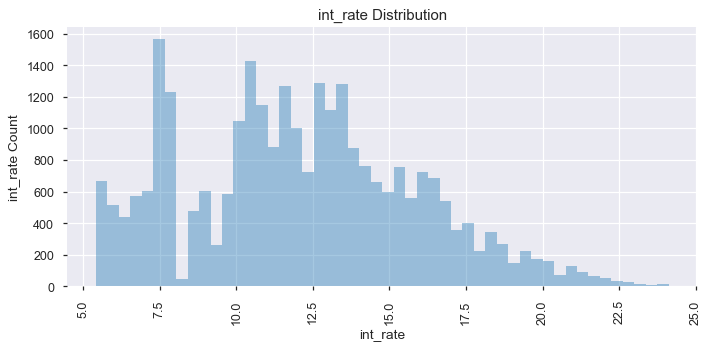

In [29]:
plot_feature('int_rate',True , False)

There are higher number of loans at low interest rates. Now we will divide the interest rates into buckets for further analysis.

In [30]:
#converting the rate of interest in segmented group in new columns
#0 to 10% - Low 
#10 to 18% - Medium
#More than 18% - High

def f(row):
    if row['int_rate'] <=10 :
        val = 'Low'
    elif row['int_rate'] >10 and  row['int_rate'] <=18:
        val = 'Medium'
    else:
        val = 'High'
    return val

loan_risk['int_rate_range'] = loan_risk.apply(f, axis=1)

# Compute a simple cross-tabulation of two (or more) factors. 
# By default computes a frequency table of the factors
intrate = pd.crosstab(loan_risk['int_rate_range'],loan_risk['loan_status'])

intrate_prop=(intrate.div(intrate.sum(axis=1).astype(float), axis=0))
intrate_prop=intrate_prop.round(4)*100
#intrate.div(intrate.sum(axis=1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(10,7),title="Loan status Vs Interest Rate")
intrate_prop

loan_status,0,1
int_rate_range,,
High,70.51,29.49
Low,93.35,6.65
Medium,83.85,16.15


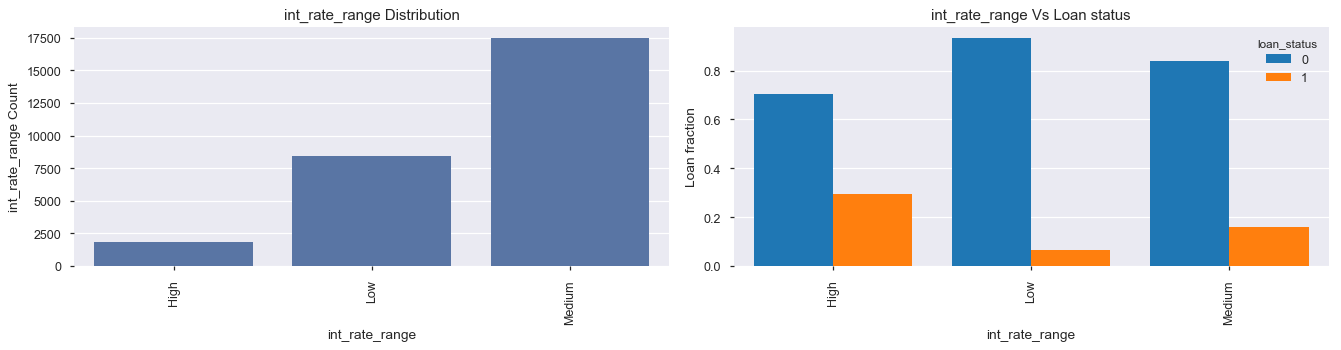

In [31]:
plot_feature('int_rate_range',False,True)

### Inference: Interest rate
For low interest rates, more loans seem to be fully paid compared to Charged off. Also for high interest rates, more loans seem to be Charged off. So interest rate is definitely a factor influencing loan_status.

### Loan amount

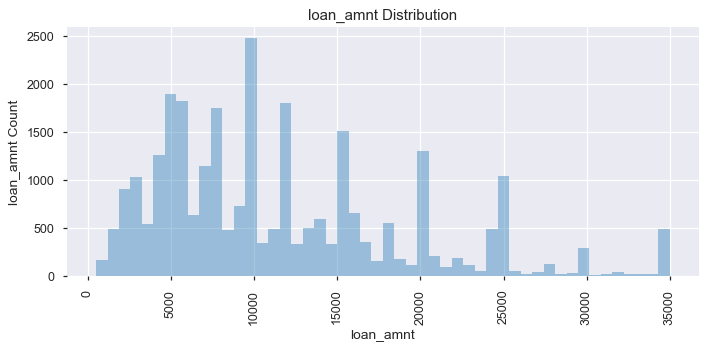

In [32]:
#Distribution of loan status
#ax=sns.distplot(loan_risk['loan_amnt'].values,  color="#F7522F")
#ax.set_title("Loan Applied by the Borrower", fontsize=14)
plot_feature('loan_amnt',True,False)

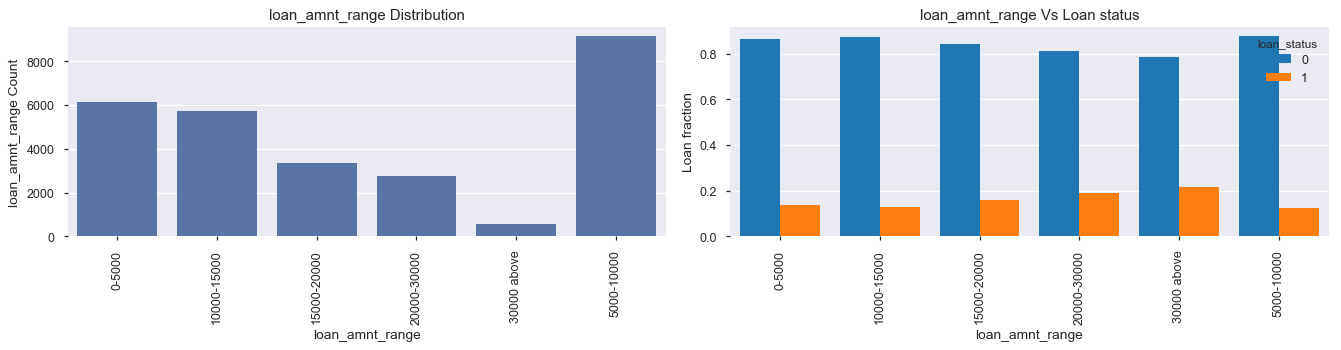

In [33]:
#converting the loan amount in segmented group in new columns in range of 5000
#(0 to 15Tier 1), (15 to 20 Tier 2), (>20 Tier 3)
def i(row):
    if row['loan_amnt'] <=5000:
        val = '0-5000'
    elif row['loan_amnt'] >5001 and  row['loan_amnt'] <=10000:
        val = '5000-10000'
    elif row['loan_amnt'] >10001 and  row['loan_amnt'] <=15000:
        val = '10000-15000'
    elif row['loan_amnt'] >15001 and  row['loan_amnt'] <=20000:
        val = '15000-20000'
    elif row['loan_amnt'] >20001 and  row['loan_amnt'] <=30000:
        val = '20000-30000'
    else:
        val = '30000 above'
    return val

loan_risk['loan_amnt_range'] = loan_risk.apply(i, axis=1)

#loan_amnt_tab = pd.crosstab(loan_risk['loan_amnt_range'],loan_risk['loan_status'])
#loan_amnt_tab.div(loan_amnt_tab.sum(axis=1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(8,6),title="Loan Amount Range Vs Loan Status")

plot_feature('loan_amnt_range',False,True)

### Inference: Loan amount
From the first plot, we can infer that most loan amounts are in the 5000 - 15000 range. We divided the loan amounts into buckets for further analysis and plotted the loan amount range vs loan status. Figure above shows that as the loan amount increases, the %default increases and is maximum for the 30000 and above bucket.

### Term

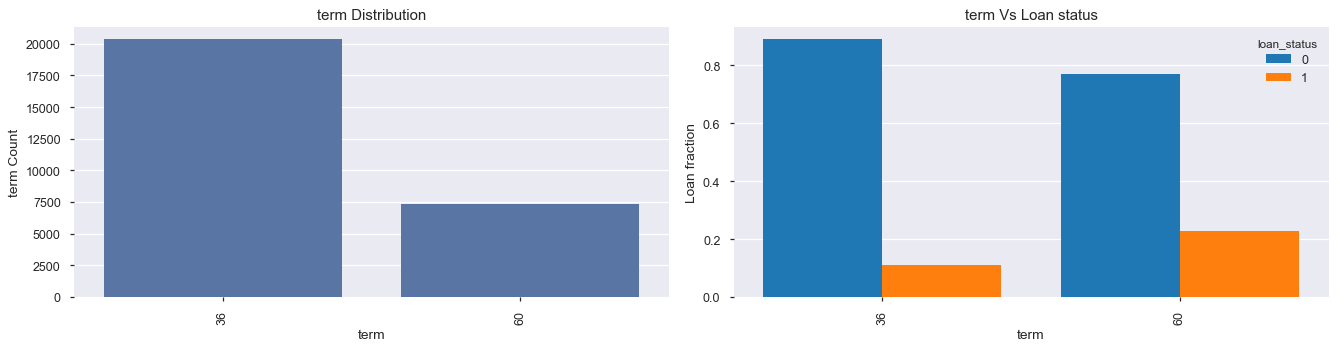

In [34]:
#data = pd.crosstab(loan_risk['term'],loan_risk['loan_status'])
#data.div(data.sum(axis=1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(8,6),title='Term vs Loan Status')
plot_feature('term',False,True)

### Inference: Term
Proportion of Charged off is higher for 60 months term loans.

### Grade

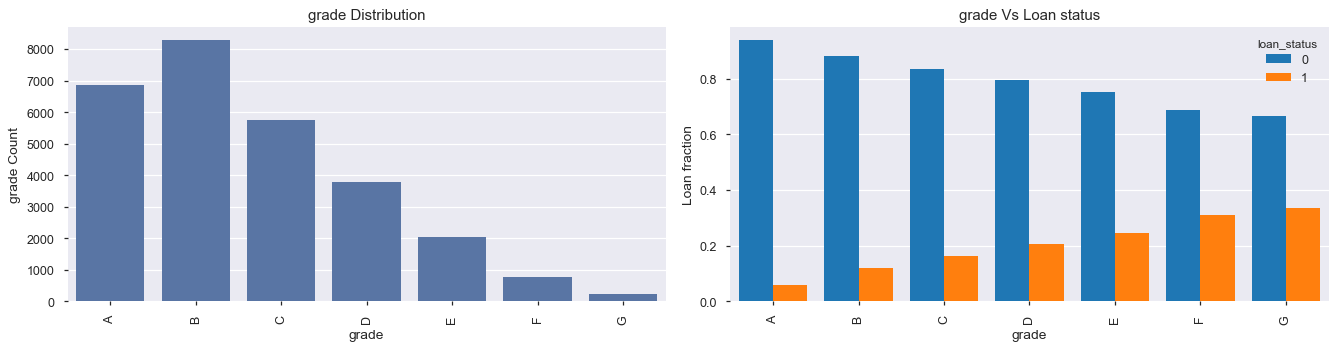

In [35]:
plot_feature('grade',False, True)

### Inference: Grade:

As the grade falls ( or quality of loan decreases), proportion of Charged off increases.

### Employment length

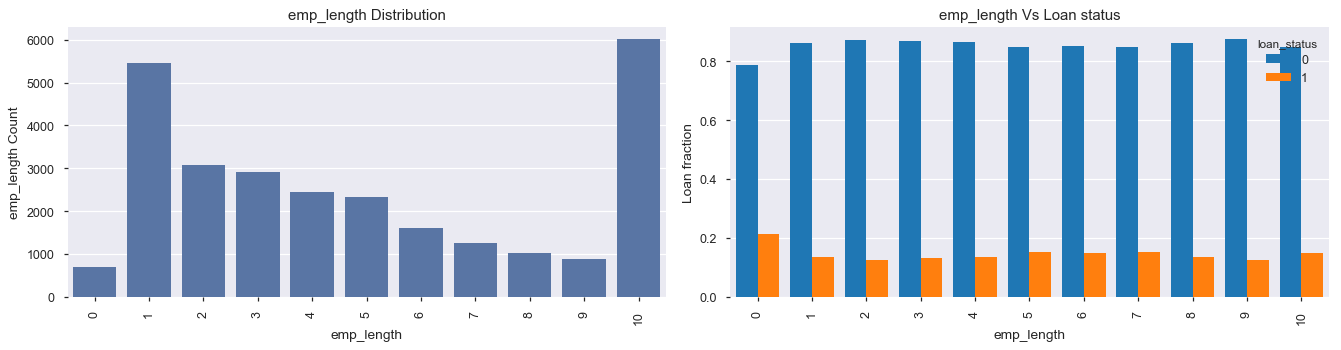

In [36]:
plot_feature('emp_length',False, True)

### Inference: Emp length
No conclusive trend is apparent based on emp_length.

### Home ownership

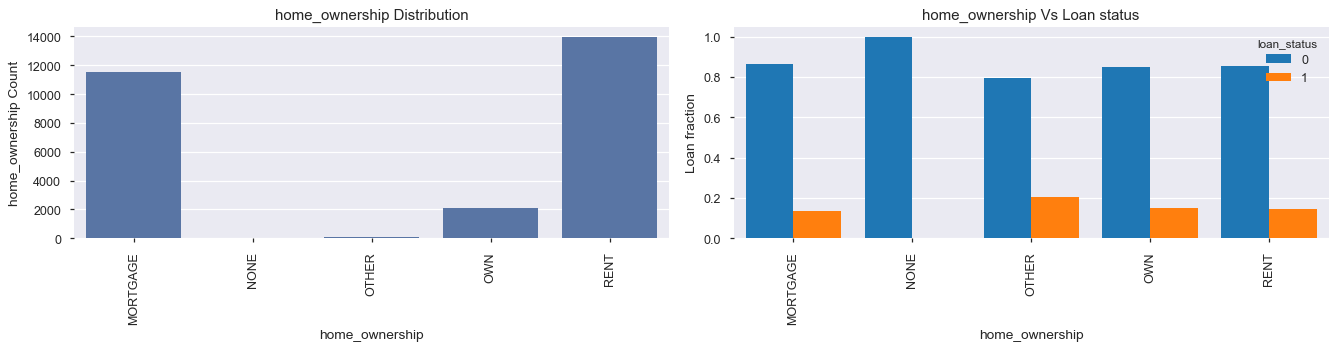

In [37]:
plot_feature('home_ownership',False,True)

### Inference: Home ownership
Home ownership Other has the most defaults, but the difference is not much.

### Verification Status


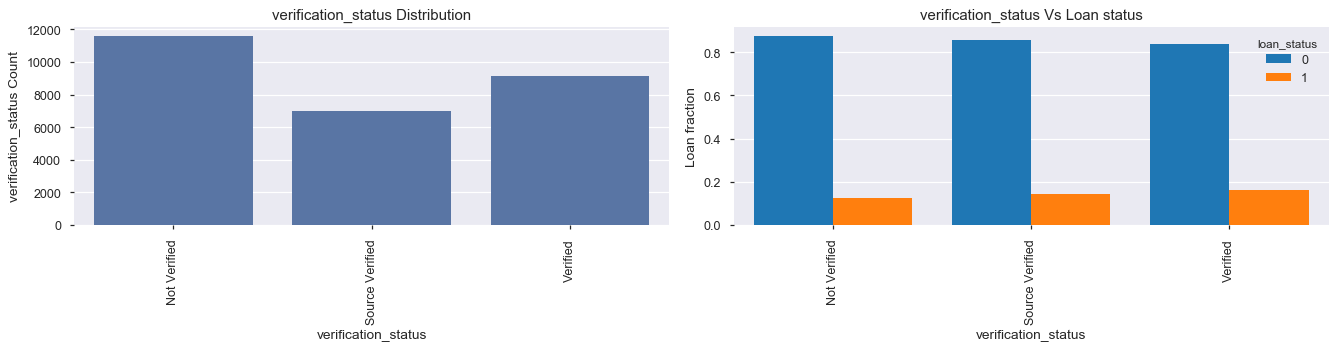

In [38]:
plot_feature('verification_status',False, True)

### Inference: Verification status
Verification status does not affect loan_status much.

### Deriving Type Driven Metrics based on Issue Date

### Loan Issue Date

In [39]:
#issue_d
#converting date features in date data type
loan_risk['issue_d']=pd.to_datetime(loan_risk['issue_d'].str.upper(), format='%b-%y', yearfirst=False)
loan_risk['issue_year'] = loan_risk['issue_d'].dt.year
loan_risk['issue_month'] = loan_risk['issue_d'].dt.month

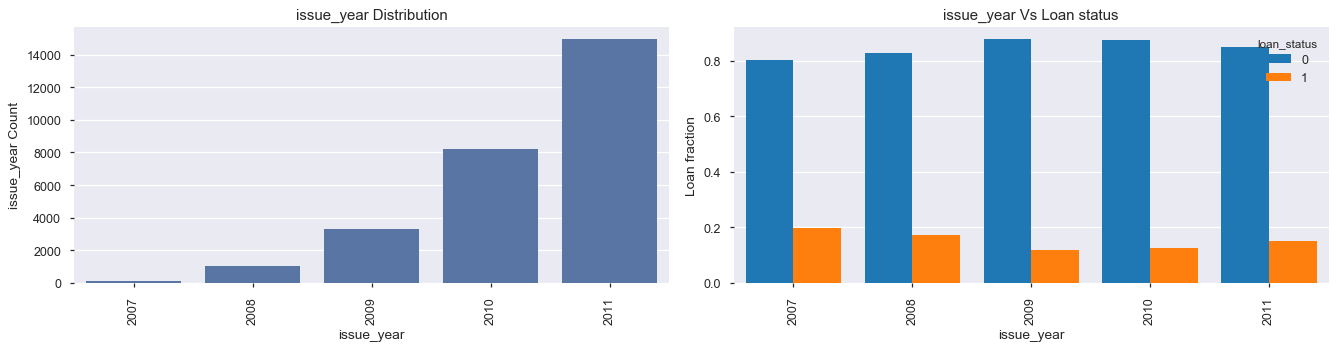

In [40]:
plot_feature('issue_year',False, True)

### Inference: Loan issued Year
Number of loans is increasing each year. The maximum number of defaults was in the year 2007. We cannot use issue_year as a factor for analysis for defaults.

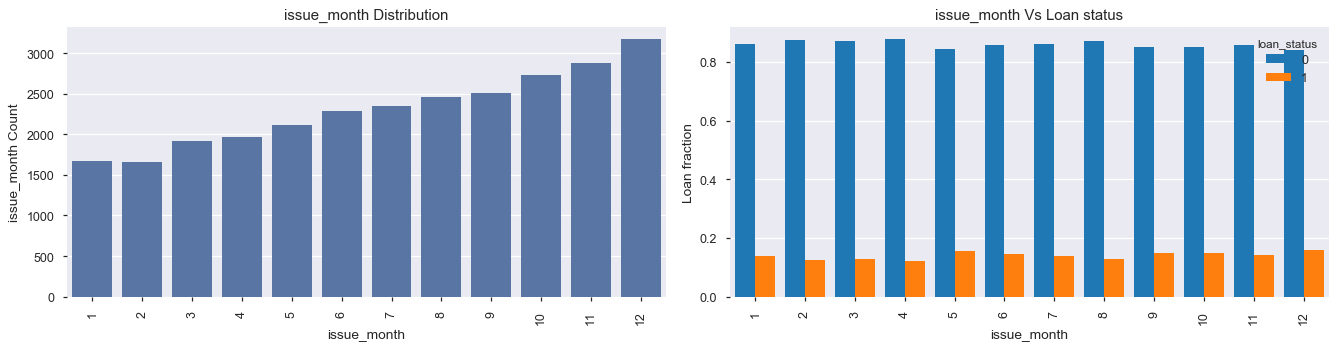

In [41]:
plot_feature('issue_month',False, True)

### Inference: Loan issued month
Number of loans is the highest in December. But the month loan is issued has no obvious impact on default.

### Purpose:

In [42]:
loan_risk['purpose'].value_counts()

debt_consolidation    13888
credit_card            3848
other                  3021
home_improvement       2149
major_purchase         1584
small_business         1322
car                    1095
wedding                 786
Name: purpose, dtype: int64

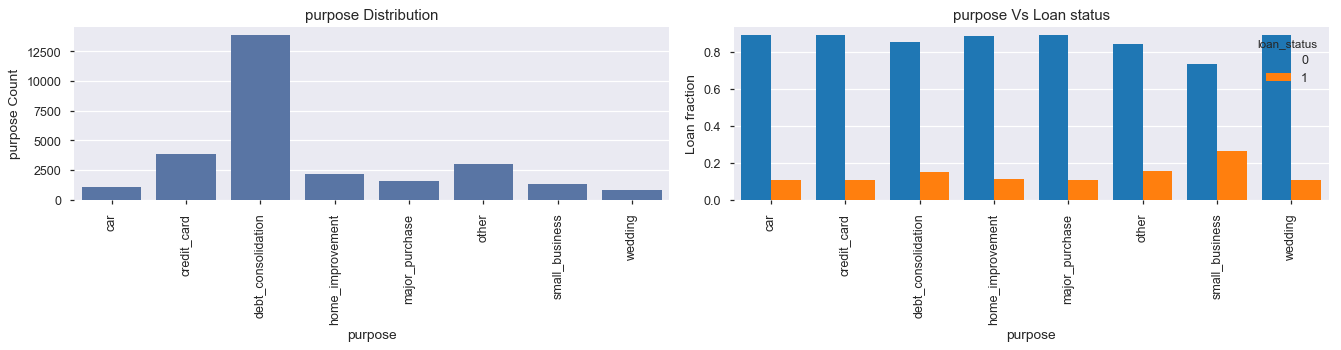

In [43]:
plot_feature('purpose',False, True)

### Inference: Purpose:
Purpose is a factor in the loan being defaulted. Debt Consolidation is the most frequent purpose for loans and Small_business loans have the most charged off proportion.

### Address state

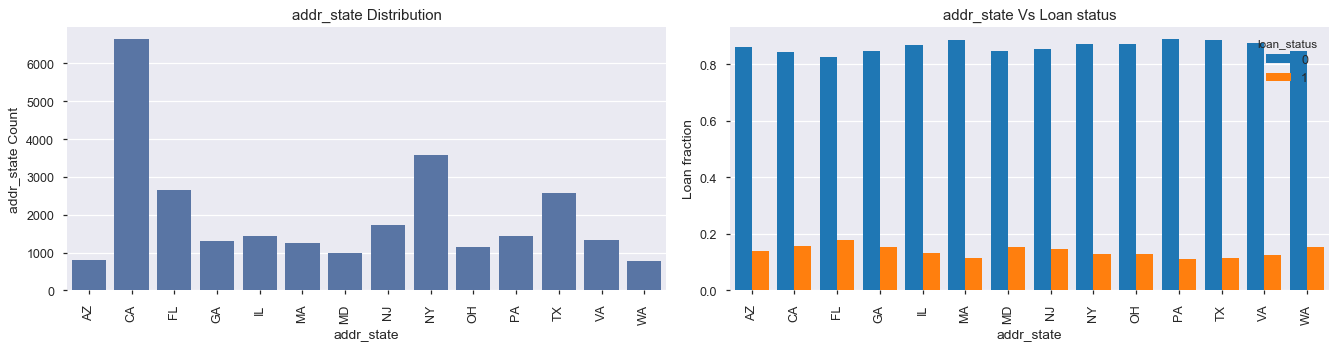

In [44]:
plot_feature('addr_state',False, True)

### Inference: Address_state
CA,NY,TX, and FL - states with high cost of living have a high number of loans. But NV has the most charged off loans. We will try to analyze the cost of living more.

### Derived Metric - Rank by cost of living of state
Assumption: To check if cost of living in the state is a factor driving loans or defaults on loans, we used the data from https://www.missourieconomy.org/indicators/cost_of_living/ to get a ranking by cost of living of all 50 US states - 1 being the least cost of living.

In [45]:
statesCostOfLiving = pd.DataFrame(columns=["state","costRank"],data=[['MS',1], ['AR',2], ['OK',3], ['MO',4], ['NM',5], ['TN',6], ['MI',7], ['KS',8], ['GA',9], ['WY',10], ['AL',11], ['IN',12], ['IA',13], ['NE',14], ['OH',15], ['KY',16], ['WV',17], ['TX',18], ['ID',19], ['LA',20], ['IL',21], ['NC',22], ['SC',23], ['AZ',24], ['WI',25], ['FL',26], ['UT',27], ['ND',28], ['SD',29], ['VA',30], ['MN',31], ['PA',32], ['CO',33], ['MT',34], ['DE',35], ['NV',36], ['NH',37], ['WA',38], ['VT',39], ['ME',40], ['RI',41], ['NJ',42], ['CT',43], ['MD',44], ['AK',45], ['MA',46], ['OR',47], ['NY',48], ['CA',49], ['DC',50], ['HI',51]])
statesCostOfLiving.head()

,state,costRank
0,MS,1
1,AR,2
2,OK,3
3,MO,4
4,NM,5


In [46]:
loan_risk = loan_risk.merge(statesCostOfLiving,how='left',left_on='addr_state',right_on='state')

In [47]:
loan_risk['costRank'].nunique()

14

In [48]:
loan_risk['costRank'] = loan_risk['costRank'].rank(ascending=True,method='dense').astype(np.int)

Higher numerical value of rank indicates higher cost of living in the state.

In [49]:
loan_risk.head()

,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,mths_since_last_delinq,revol_util,int_rate_range,loan_amnt_range,issue_year,issue_month,state,costRank
0,5000,36,10.65,B,B2,10,RENT,24000.0,Verified,2011-12-01,0,credit_card,AZ,27.65,NaN,83.7,Medium,0-5000,2011,12,AZ,5
1,2500,60,15.27,C,C4,1,RENT,30000.0,Source Verified,2011-12-01,1,car,GA,1.00,NaN,9.4,Medium,0-5000,2011,12,GA,1
2,2400,36,15.96,C,C5,10,RENT,12252.0,Not Verified,2011-12-01,0,small_business,IL,8.72,NaN,98.5,Medium,0-5000,2011,12,IL,4
3,10000,36,13.49,C,C1,10,RENT,49200.0,Source Verified,2011-12-01,0,other,CA,20.00,35.0,21.0,Medium,5000-10000,2011,12,CA,14
4,5000,36,7.90,A,A4,3,RENT,36000.0,Source Verified,2011-12-01,0,wedding,AZ,11.20,NaN,28.3,Low,0-5000,2011,12,AZ,5


In [50]:
loan_risk=loan_risk.drop('state',axis=1)

In [51]:
loan_risk.shape

(27693, 21)

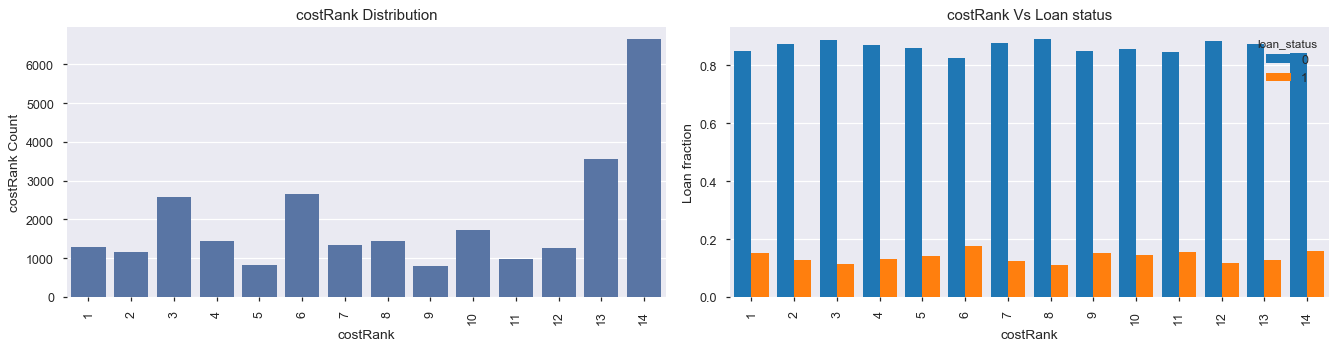

In [52]:
plot_feature('costRank',False,True)

### Inference: Cost of living

While cost of living is a factor influencing the number of loans, it is not affecting the % of defaults. This may be because states with higher cost of living also have higher incomes typically.

### DTI

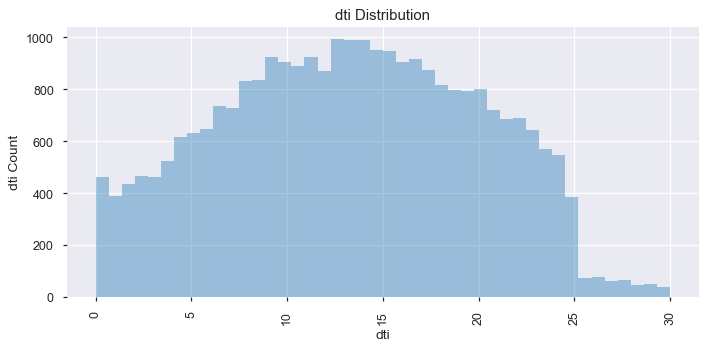

In [53]:
plot_feature('dti',True, False)

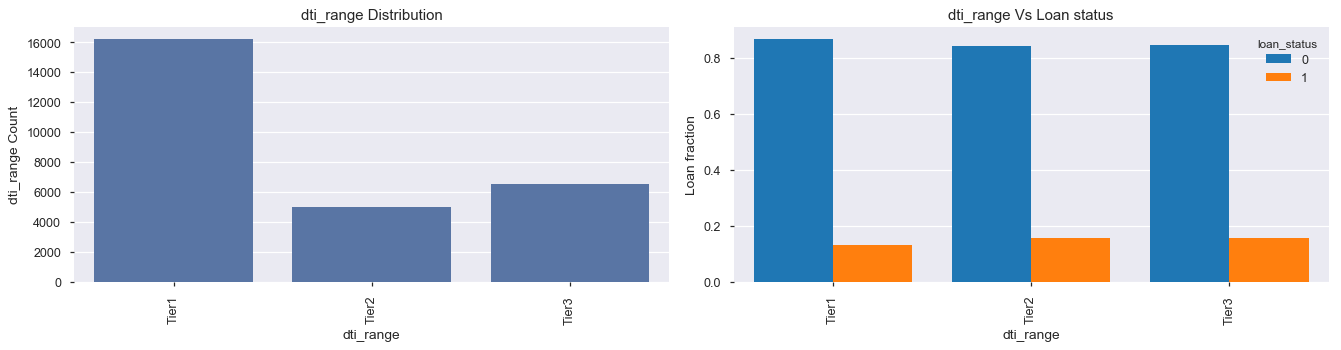

In [54]:
#converting the dti in segmented group in new columns
#0 to 15 - Tier 1 
#15 to 20 - Tier 2
#More than 20 - Tier 3

def h(row):
    if row['dti'] <=15 :
        val = 'Tier1'
    elif row['dti'] >16 and  row['dti'] <=20:
        val = 'Tier2'
    else:
        val = 'Tier3'
    return val

loan_risk['dti_range'] = loan_risk.apply(h, axis=1)
plot_feature('dti_range',False,True)


### Inference:DTI

With increase in DTI, %of defaults increases, but not by much.

### Annual Income

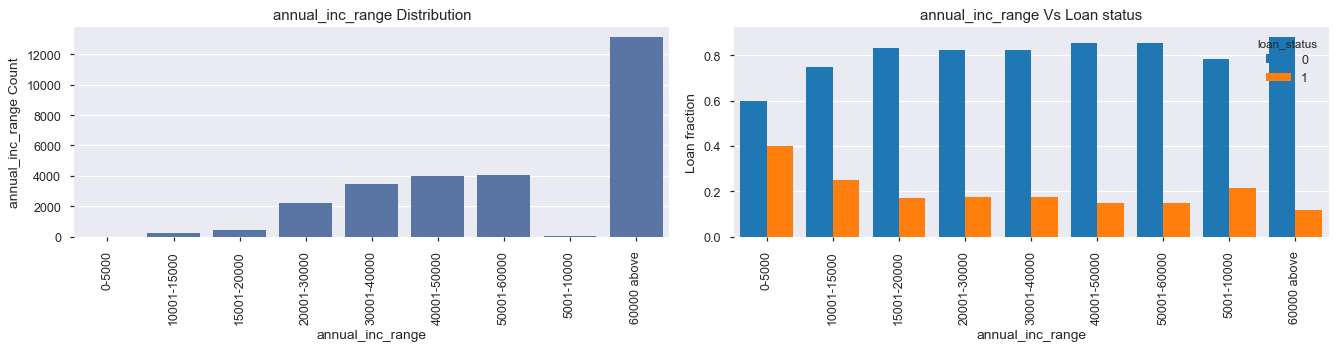

In [55]:
#converting the annual income in segmented group in new columns in range of 5000
def g(row):
    if row['annual_inc'] <=5000:
        val = '0-5000'
    elif row['annual_inc'] >5001 and  row['annual_inc'] <=10000:
        val = '5001-10000'
    elif row['annual_inc'] >10001 and  row['annual_inc'] <=15000:
        val = '10001-15000'
    elif row['annual_inc'] >15001 and  row['annual_inc'] <=20000:
        val = '15001-20000'
    elif row['annual_inc'] >20001 and  row['annual_inc'] <=30000:
        val = '20001-30000'
    elif row['annual_inc'] >30001 and  row['annual_inc'] <=40000:
        val = '30001-40000'
    elif row['annual_inc'] >30001 and  row['annual_inc'] <=40000:
        val = '30001-40000'
    elif row['annual_inc'] >40001 and  row['annual_inc'] <=50000:
        val = '40001-50000'
    elif row['annual_inc'] >50001 and  row['annual_inc'] <=60000:
        val = '50001-60000'
    else:
        val = '60000 above'
    return val

loan_risk['annual_inc_range'] = loan_risk.apply(g, axis=1)
plot_feature('annual_inc_range',False,True)

### Inference: Annual Income

The lowest income groups - 0-5000, 5001-10000 and 10001-15000 have the highest default rates. But the number of loans in this range is very low. So we will ignore this feature.

### Revolving line utilization rate

According to data description, this column shows the amount of credit the borrower is using relative to all available revolving credit. Since this is a ratio/percentage, a lower value means the borrower is using less lines of credit. Now we will divide this into buckets.

In [56]:
#converting the revol_utilt in segmented group in new columns
#(Excellent0 to 10), (Good 10 to 30), (Fair 30 to 50)(Poor50 to 75), (Very poor Greater than 75)
def k(row):
    if row['revol_util'] <=10:
        val = 'Excellent'
    elif row['revol_util'] >11 and  row['revol_util'] <=30:
        val = 'Good'
    elif row['revol_util'] >31 and  row['revol_util'] <=50:
        val = 'Fair'
    elif row['revol_util'] >51 and  row['revol_util'] <=75:
        val = 'Poor'
    else:
        val = 'Very poor'
    return val

loan_risk['revol_util_range'] = loan_risk.apply(k, axis=1)

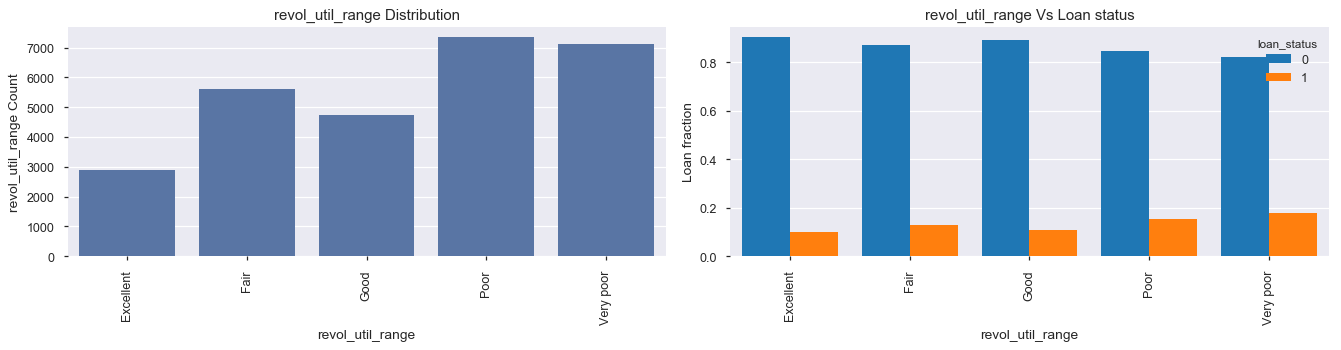

In [57]:
plot_feature('revol_util_range',False,True)

### Inference: Revolving line utilization rate

Number of loans is very high for Poor and Very Poor Revolving line utilization rate. And these categories also have high defaults.

### Sub grade

We will convert the subgrade to numbers so we can check if they are correlated to any other feature.

In [58]:
loan_risk['sub_grade'] = loan_risk['sub_grade'].rank(ascending=True,method='dense').astype(np.int)

In [59]:
loan_risk.corr()

,loan_amnt,term,int_rate,sub_grade,emp_length,annual_inc,dti,mths_since_last_delinq,revol_util,issue_year,issue_month,costRank
loan_amnt,1.000000,0.356186,0.313435,0.307482,0.164106,0.264128,0.066837,0.014354,0.064659,0.117293,0.065176,0.004968
term,0.356186,1.000000,0.451680,0.440727,0.103178,0.040154,0.081133,0.034024,0.064091,0.262903,0.063905,-0.022223
int_rate,0.313435,0.451680,1.000000,0.961339,0.017312,0.053110,0.109639,-0.056964,0.465969,0.050104,0.048486,0.012537
sub_grade,0.307482,0.440727,0.961339,1.000000,0.011549,0.057013,0.100561,-0.077329,0.454299,-0.003743,-0.016479,0.014969
emp_length,0.164106,0.103178,0.017312,0.011549,1.000000,0.119858,0.055213,0.036304,0.019219,0.085360,0.021957,-0.010952
annual_inc,0.264128,0.040154,0.053110,0.057013,0.119858,1.000000,-0.130340,-0.007455,0.016175,0.006062,0.009169,0.027936
dti,0.066837,0.081133,0.109639,0.100561,0.055213,-0.130340,1.000000,0.073005,0.268336,0.089884,0.023183,-0.077012
mths_since_last_delinq,0.014354,0.034024,-0.056964,-0.077329,0.036304,-0.007455,0.073005,1.000000,0.104179,0.123579,0.061603,-0.010412
revol_util,0.064659,0.064091,0.465969,0.454299,0.019219,0.016175,0.268336,0.104179,1.000000,0.057309,0.054183,0.039099
issue_year,0.117293,0.262903,0.050104,-0.003743,0.085360,0.006062,0.089884,0.123579,0.057309,1.000000,-0.022500,-0.004925


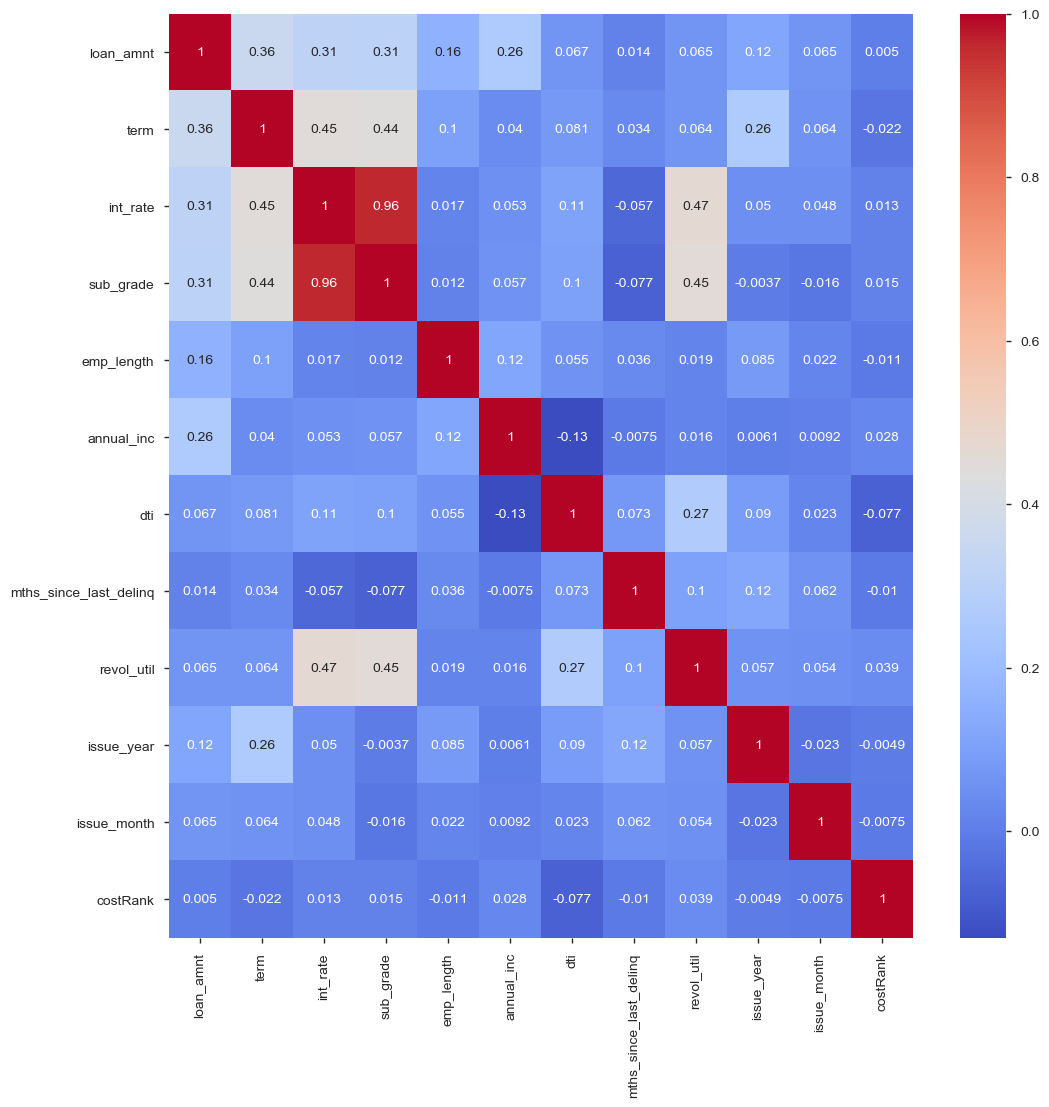

In [60]:
#correlation between the variables
plt.figure(figsize=(12, 12))
sns.heatmap(loan_risk.corr(), annot = True, cmap = 'coolwarm')
plt.show()

### Inference: int_rate and sub_grade
int_rate seems to be highly correlated to loan sub_grade. This implies int_rate may be calculated based on the loan subgrade. So we can drop sub_grade from further analysis.



## Bivariate Analysis


### Impact of Term and Loan amount on Loan Status

In [61]:
def plot_bivariate_df(df, col1, col2, head):
    data = pd.pivot_table(df,index=col1,columns=col2,values='loan_status',fill_value=0)
    f, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,4), dpi=90)
    
    sns.heatmap( data, annot=True, cmap = 'coolwarm',ax=ax, cbar=False )

    if len(head) > 0 :
        ax.set_title('Impact of ' + col1 + ' and ' + col2 + ' on Default % : ' + head )
    else:
        ax.set_title('Impact of ' + col1 + ' and ' + col2 + ' on Default %' )
    for t in ax.texts: 
        t.set_text(str(round(float(t.get_text()) * 100, 2 )) + " %")
    ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
    plt.show()
    return

def plot_bivariate(col1, col2):
    plot_bivariate_df(loan_risk, col1, col2, '')
    return

In [62]:
loan_risk['loan_status'] = loan_risk['loan_status'].apply(pd.to_numeric)
loan_risk['loan_status'].value_counts()

0    23777
1     3916
Name: loan_status, dtype: int64

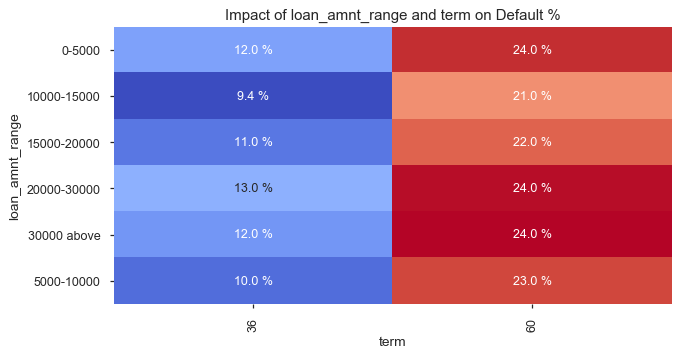

In [63]:
#term analysis with loan amount and impact on loan status
plot_bivariate('loan_amnt_range','term')

### Inference: Term and Loan on Loan Status

Loan amounts in the range of 0-5000, 20000-30000 and 30000+ with terms of 60 months have higher percentage of default.

### Impact of Revolving Line Utilization Credit and Loan amount on Loan Status

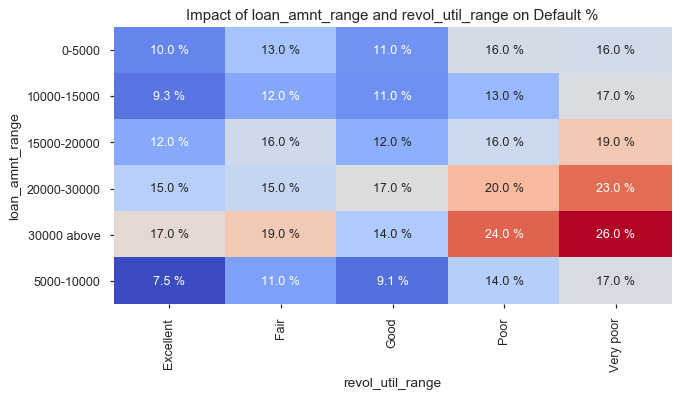

In [64]:
plot_bivariate('loan_amnt_range','revol_util_range')

### Inference: Line utilization credit and Loan amount on Loan Status

Loans given to people with Poor and Very poor Line Utilization Credit and high amounts have the highest default rate.

### Impact of loan amount and grade on Loan Status Default%

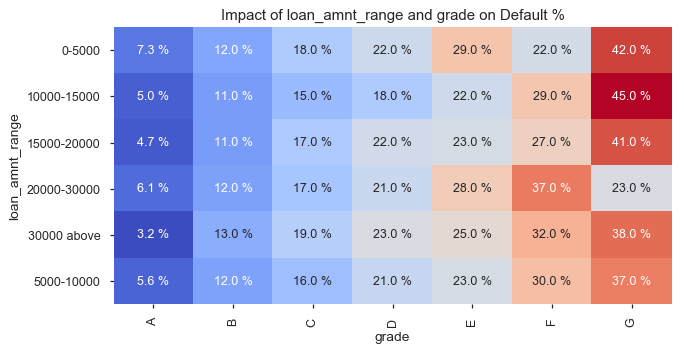

In [65]:
#grade analysis with loan amount and impact on loan status
plot_bivariate('loan_amnt_range','grade')

### Inference: Impact of loan amount and grade on Loan Status Default%

Grades F and G have very high default rates.

### Impact of Purpose and Loan Amount over Loan Default %

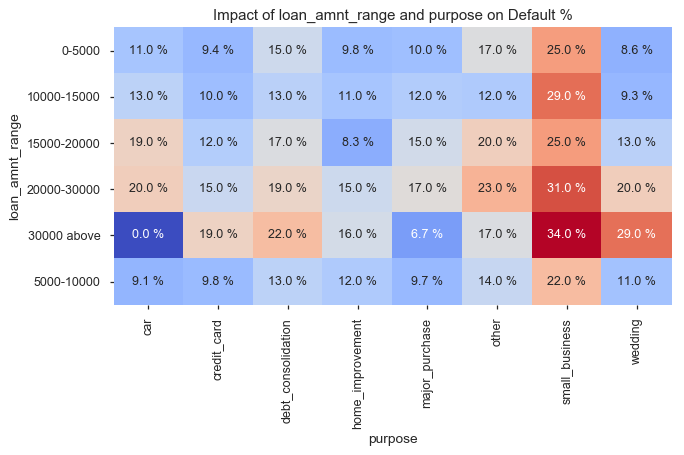

In [66]:
#distibution of purpose of loan/loan product by loan status
plot_bivariate('loan_amnt_range','purpose')

### Inference: Impact of Purpose and Loan Amount over Loan Default %

1. Small Business Loans have a high default rate irrespective of loan amount.
2. Wedding loans with loan amount > 20000 have a high default rate.
3. Debt consolidation loans > 20000 have a high default rate.

### Impact of Purpose and Interest Rate over Loan Default %

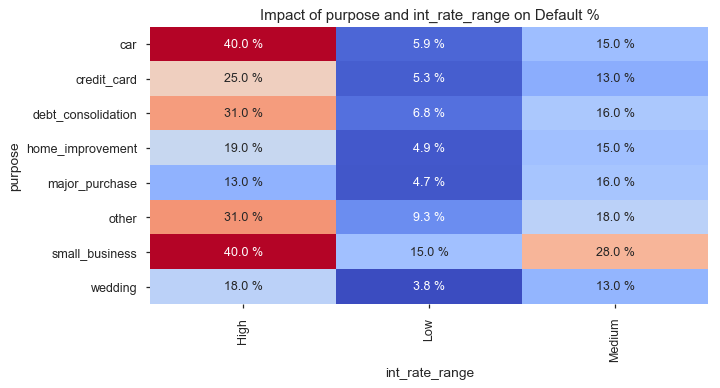

In [67]:
plot_bivariate('purpose','int_rate_range')

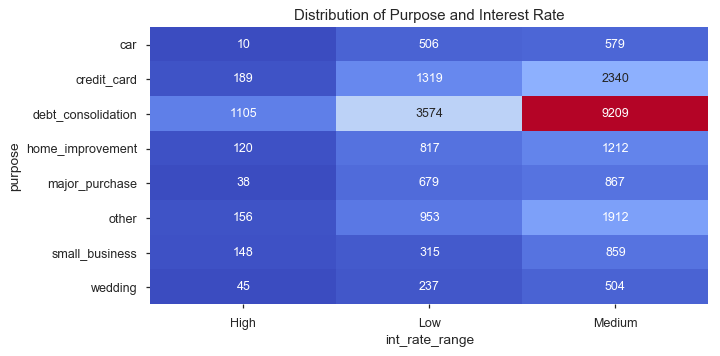

In [68]:
data = pd.pivot_table(loan_risk,index='purpose',columns='int_rate_range',values='loan_status', aggfunc=len,fill_value=0)
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,4), dpi=90)

sns.heatmap( data, annot=True, fmt='.0f', cmap = 'coolwarm',ax=ax, cbar=False )
ax.set_title('Distribution of Purpose and Interest Rate' )
plt.show()


### Impact of Loan amount and DTI on loan status

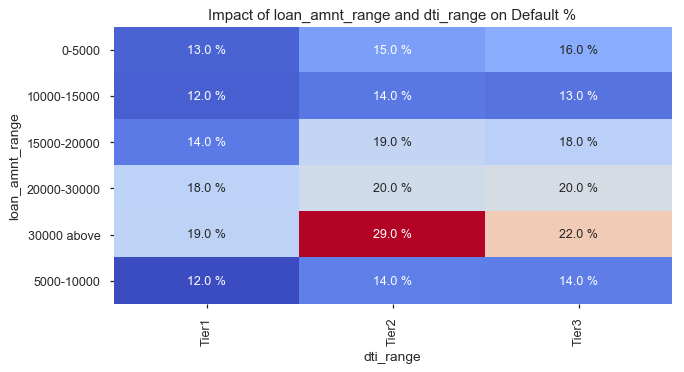

In [69]:
plot_bivariate('loan_amnt_range','dti_range')

### Inference: Impact of Loan amount and DTI on loan status

Tier 2 and Tier DTI with high loan amount have high defaults

### Impact of Loan Amount and Annual Income on Loan Status

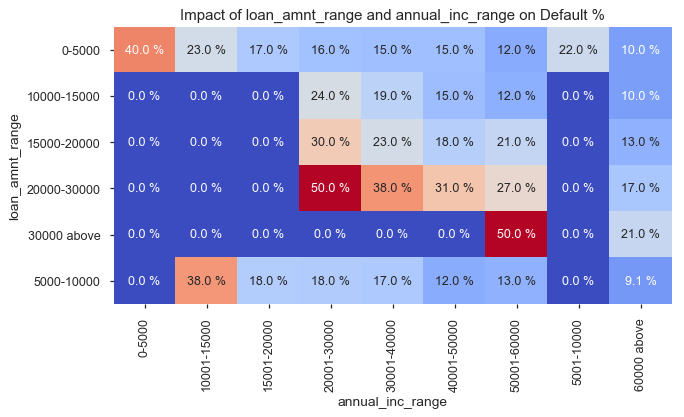

In [70]:
plot_bivariate('loan_amnt_range','annual_inc_range')

### Inference: Impact of Loan Amount and Annual Income on Loan Status

Loans where loan amount is close to the annual income have high default rates.


### Analysis by purpose

In [71]:
# Analysing the loan status for Top 4 products on the basis of Loan purpose distribution and most default rates, we get the following
# Debt Consolidation
# Credit Card loans
# Other loans
# Home improvement
# Identifying the key attributes leading to loan defaults in these top 4 product types

#creating the subsets of loan products
#purpose=debt_consolidation
debt_consolidation_set = loan_risk['purpose'] == 'debt_consolidation'
loan_debt_consolidation=loan_risk[debt_consolidation_set]
#purpose=other
other_set = loan_risk['purpose'] == 'other'
loan_other=loan_risk[other_set]
#purpose=home_improvement
home_improvement_set = loan_risk['purpose'] == 'home_improvement'
loan_home_improvement=loan_risk[home_improvement_set]
#purpose=credit_card
credit_card_set = loan_risk['purpose'] == 'credit_card'
loan_credit_card=loan_risk[credit_card_set]

def ghg(df,head):
    
    plot_bivariate_df(df, 'loan_amnt_range','grade',head)
    plot_bivariate_df(df, 'loan_amnt_range','int_rate_range', head)
    plot_bivariate_df(df, 'loan_amnt_range','revol_util_range', head)
    plot_bivariate_df(df, 'loan_amnt_range','term', head)
    return


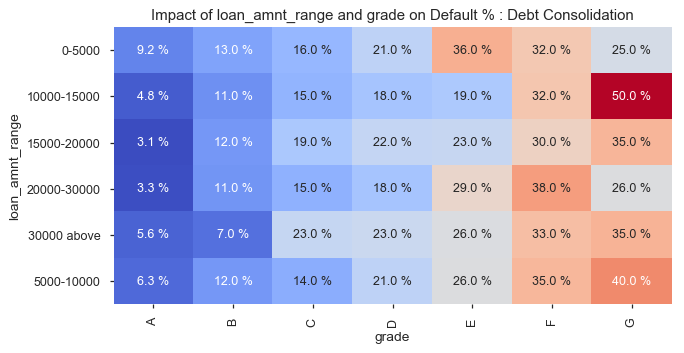

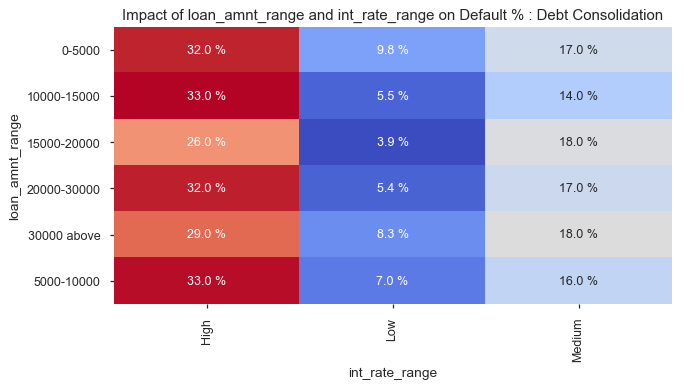

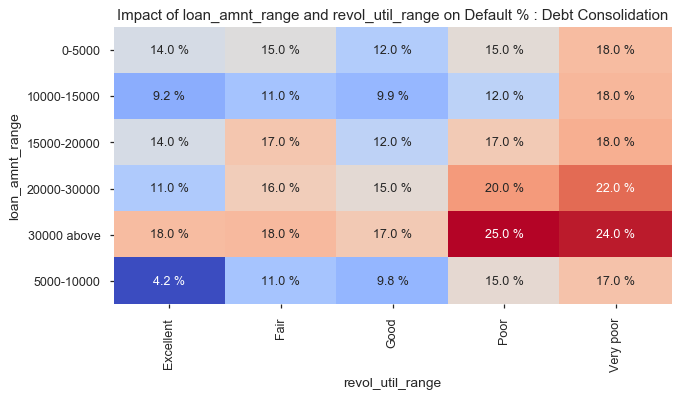

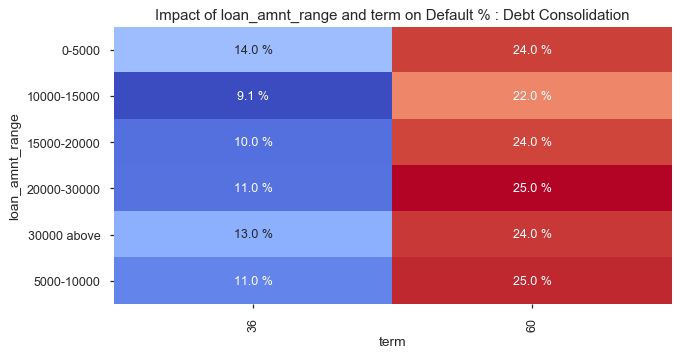

In [72]:
ghg(loan_debt_consolidation, 'Debt Consolidation')

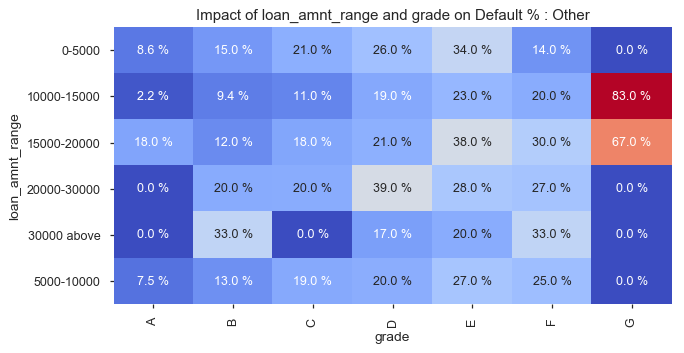

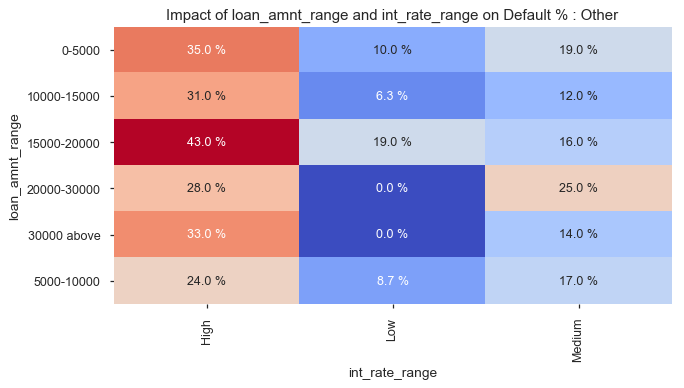

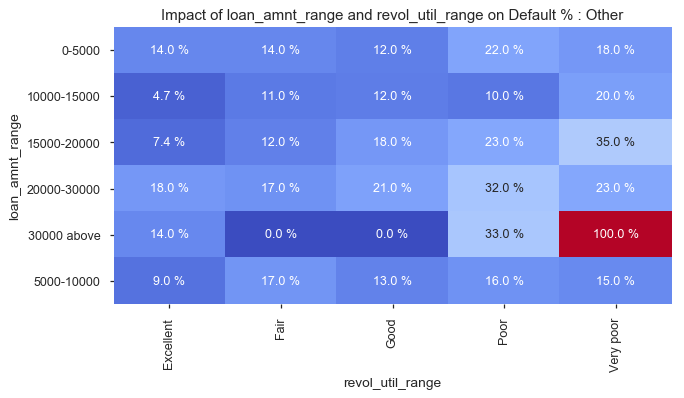

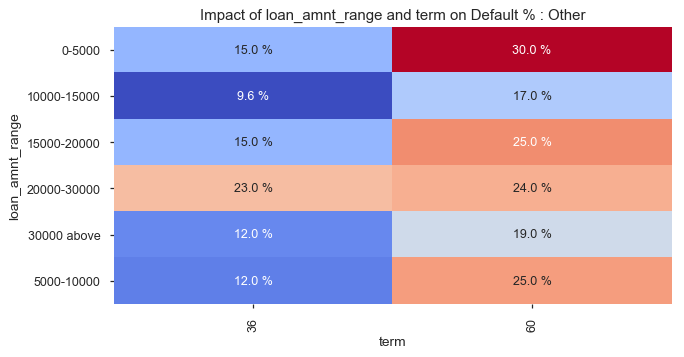

In [73]:

ghg(loan_other, 'Other')    

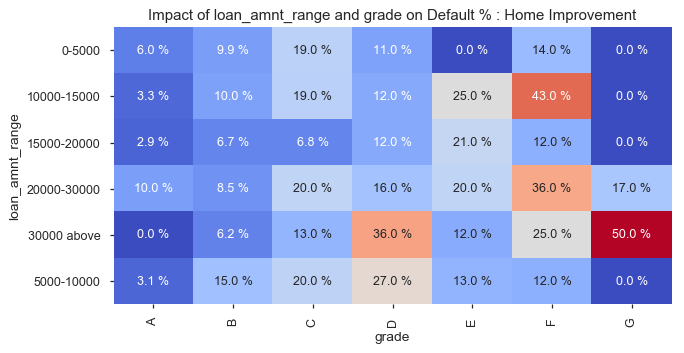

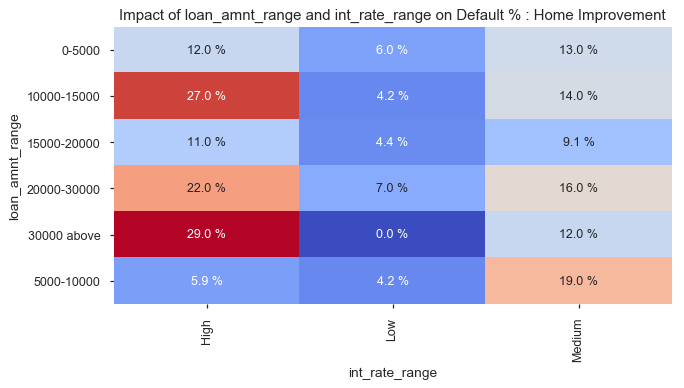

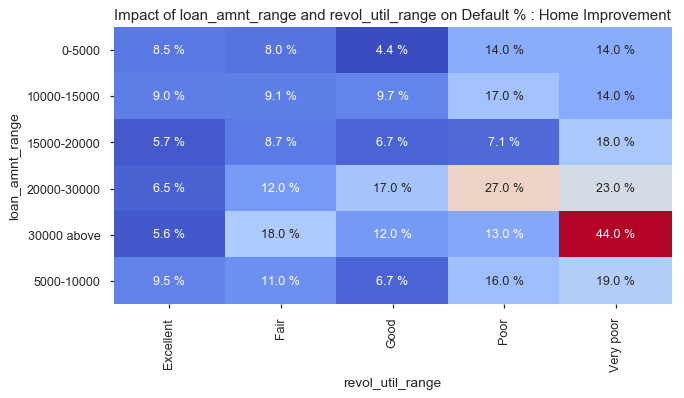

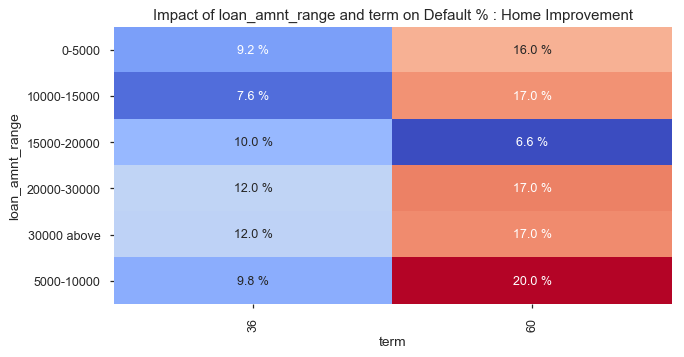

In [74]:

ghg(loan_home_improvement, 'Home Improvement')   

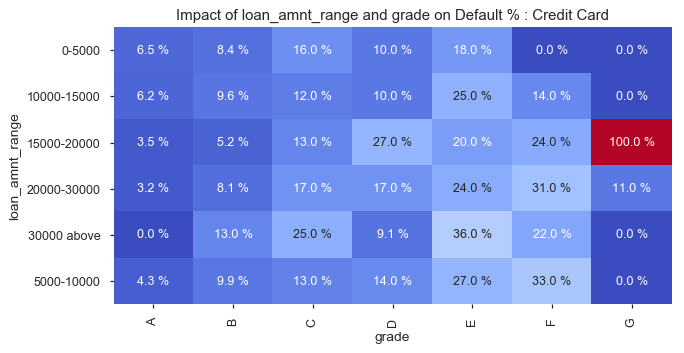

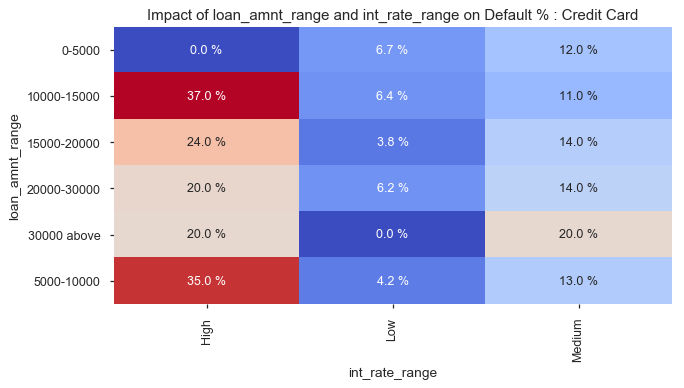

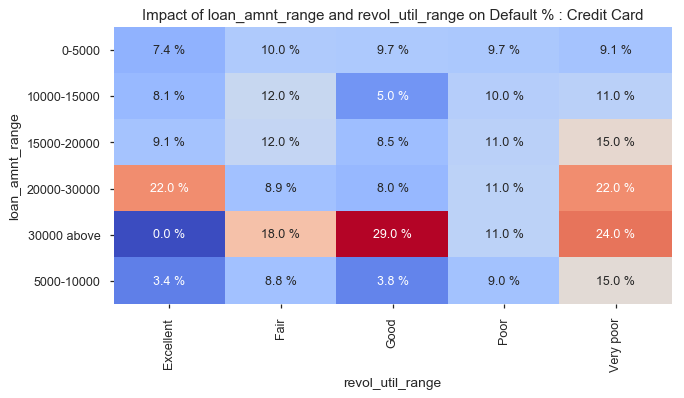

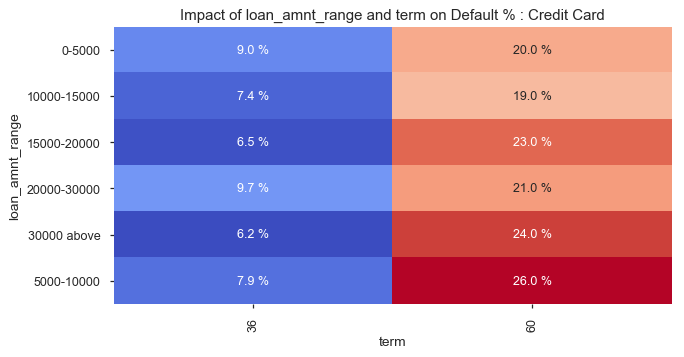

In [75]:
 
ghg(loan_credit_card, 'Credit Card')    